# Plotting the incidences of BW counties

In [1]:
import pandas as pd    # Pandas is a library to analyse various data structures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Here we read the csv-file holding the data.
# Note: the separator is a ; instead of a comma, all NA-values gave to be skipped
df_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/Infizierte.csv', sep=';',na_filter=False)
keys=df_csv.keys()
# Let us pack the counties names into a dictionary and number them
# e.g. {'Biberach': 1}
nkreise=np.arange(len(df_csv.to_numpy()[:,0]))
dict_kreise = dict(zip(df_csv.to_numpy()[:,0],nkreise))
#
df_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/Infizierte220111.csv',header=None, sep=';',na_filter=False)
data=df_csv.to_numpy()
#
dfEWZ_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/EWZLandkreise.csv',header=None, sep=';',na_filter=False)
dict_EWZkreise = dict(dfEWZ_csv.to_numpy())

In [3]:
# transform data to float
irange=np.arange(data.shape[0])
jrange=np.arange(1,data.shape[1])
datafloat=np.zeros(data.shape)
dataint=np.zeros(data.shape)
for i in irange: 
    for j in jrange:
        if data[i,j] =='': 
            datafloat[i,j]=0.
            dataint[i,j]=0
        else:
            datafloat[i,j]=float(data[i,j])
            dataint[i,j]=int(data[i,j])
#
kreisliste = ['Freiburg im Breisgau (Stadtkreis)', 'Schwäbisch Hall']
EWZahl = np.ones(44)
EWZahl[36] = 230940
EWZahl[6] = 166862
EWZahl[20] = 432580
EWZahl[0] = 198204
EWZahl[40] = 309721
EWZahl[35] = 55449
EWZahl[14] = 308436
EWZahl[28] = 197860
EWZahl[42] = 630305
#

<IPython.core.display.Javascript object>


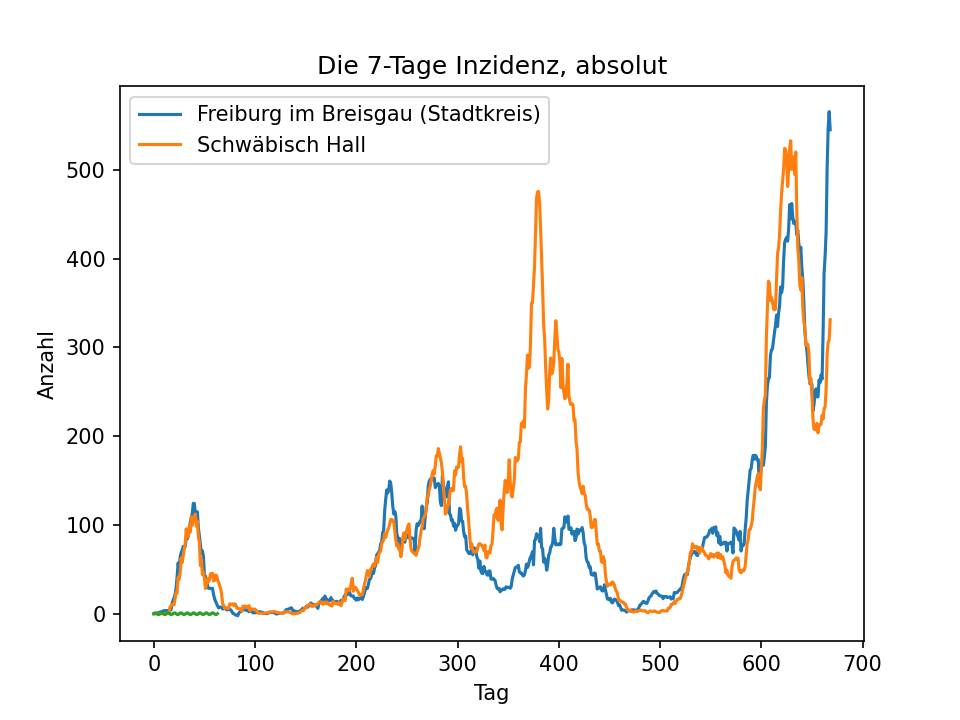

[Text(0, 0.5, 'Anzahl')]

In [4]:
%matplotlib notebook
fig, ax = plt.subplots() # let us plot the data
for kreis in kreisliste:
#for i in np.arange(44):
    factor=1.e5/EWZahl[dict_kreise[kreis]]
    #factor = 1.
    #y = np.flip(datafloat[dict_kreise[kreis]])
    y = np.flip(datafloat[dict_kreise[kreis],1:])
    y14 = np.roll(y,7)
    y14[:13] = 0
    delta = y  - y14
    ax.plot(factor*delta[0:], label=kreis)
    #ax.plot(y, label=kreis)
#
ax.legend()
ax.set_title('Die 7-Tage Inzidenz, absolut')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [ ]:
yHall = datafloat[28,1:]
yFrei =datafloat[36,1:]
DeltaHall = (yHall-np.roll(yHall,-7))*1.e5/EWZahl[28]
DeltaFrei = (yFrei-np.roll(yFrei,-7))*1.e5/EWZahl[36]
plt.plot(np.flip(DeltaHall[:-7]))
plt.plot(np.flip(DeltaFrei[:-7]))

# Correlation functions

The correlation function for two signals $A(t)$ and $B(t)$ is defined as 
$$C(t)=\lim_{\tau\rightarrow\infty}\frac{1}{\tau}\int\limits_0^\tau A(t')B(t'-t)dt'$$

Let's have some examples.

Note: Please subtract mean of every series A and B. See below

In [58]:
%matplotlib notebook
# A = B = sin(a t)
n = 200000
a = 1.
t = np.linspace(0,20*np.pi,n)
#A = np.sin(t)
#B = np.cos(t)
A = np.random.rand(n)
B = np.random.rand(n)
A = A - np.mean(A)
B = B - np.mean(B)
#plt.plot(t, A)
#plt.plot(t, B)

In [59]:
# Calculate Korrelation function between A and B. Watch out for the correct n
lmax = n//2
C = np.zeros(lmax)
for k in np.arange(lmax):
    C[k] = np.sum(A[:-k] * np.roll(B, shift = -k)[:-k])/(n-k)
    

<IPython.core.display.Javascript object>


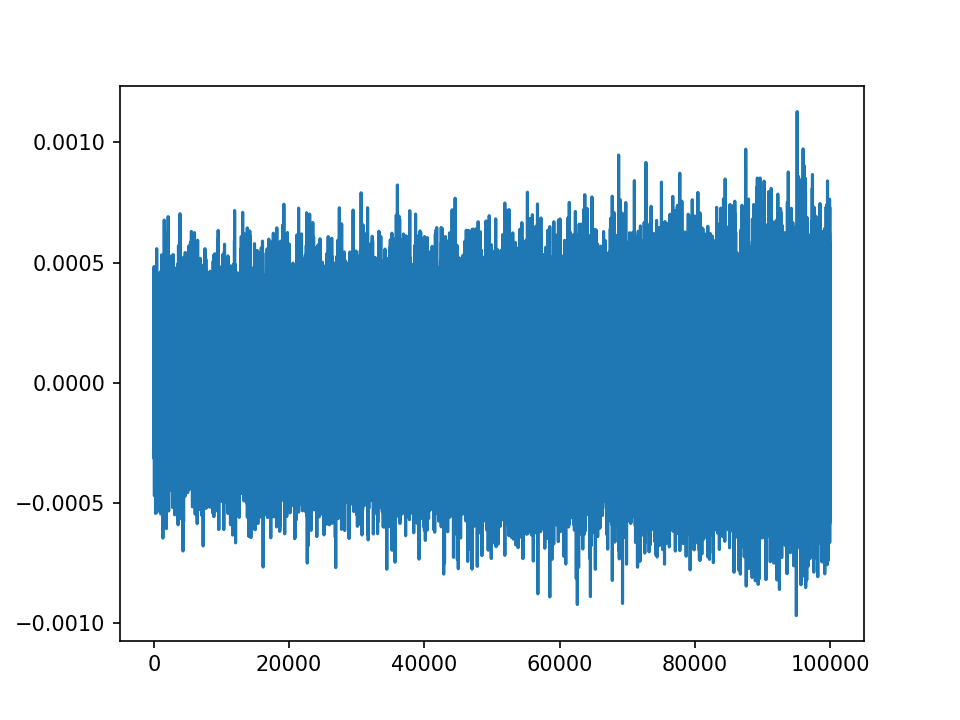

In [60]:
%matplotlib notebook
plt.plot(C)

In [44]:
np.mean(np.flip(datafloat[dict_kreise[kreisliste[0]],1:]))

5295.431988041853

<IPython.core.display.Javascript object>


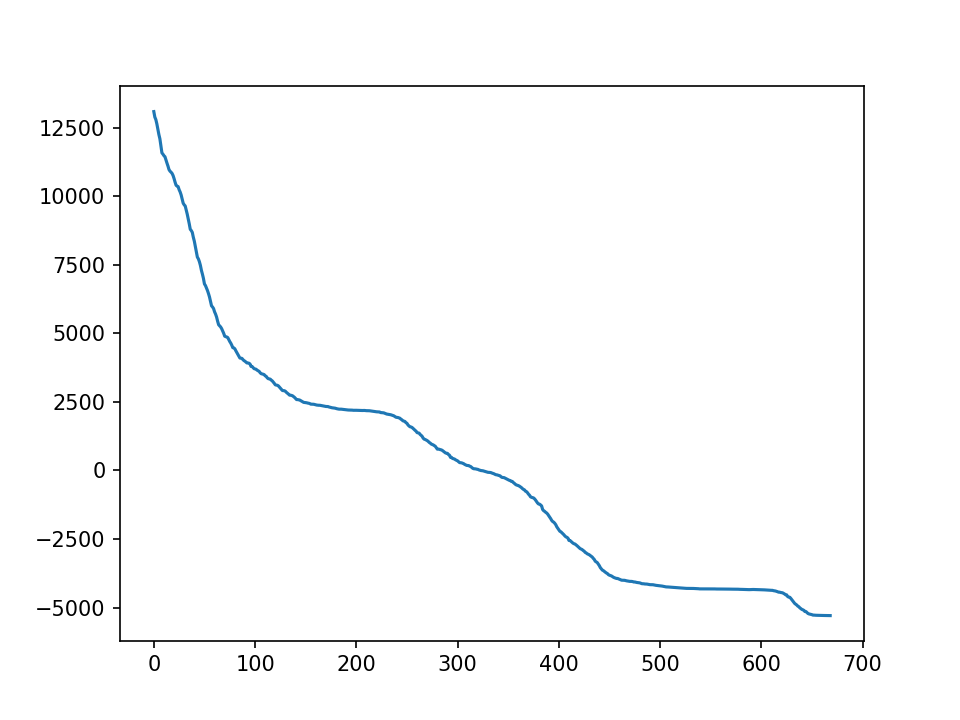

In [47]:
%matplotlib notebook
# Plot Freiburg incidences - mean
plt.plot(datafloat[dict_kreise[kreisliste[0]],1:]-np.mean(datafloat[dict_kreise[kreisliste[0]],1:]))